### Student Information
Name: Yu-Han Zhao 趙宇涵

Student ID: 110033635

GitHub ID: honey0703

Kaggle name: honey0703

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2021-Lab2-master Repo](https://github.com/fhcalderon87/DM2021-Lab2-master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2021-lab2-hw2/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 24th 11:59 pm, Friday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 29th 11:59 pm, Wednesday)__. 

## 1. Data Preparation
### 1.1 Load data
1. Read json files
2. Split to train and test df
3. Append emotions after traon df

In [79]:
# Parameter setting
featureNumber = 20000

In [2]:
# Read json data to pd
import numpy as np 
import pandas as pd
import json

# df = pd.read_json("dm2021-lab2-hw2/tweets_DM.json",lines=True, orient='columns')

In [3]:
# # Show df
# df.head()

In [4]:
# # select '_source' column as 'source'
# source = df._source

# # normalize 'source'
# twit = pd.json_normalize(source)

# # show twit
# twit.head()

In [5]:
# # rename column for merge later

# twit = twit.rename(columns={"tweet.hashtags": "hashtags", "tweet.tweet_id": "tweet_id", "tweet.text": "text"})
# twit.head()

In [6]:
# # to split train test
# # read file 'data_identification.csv'

# iden = pd.read_csv('dm2021-lab2-hw2/data_identification.csv')
# iden.head()

In [7]:
# # merge twit dataframe with data_identification.csv

# total = pd.merge(twit, iden, on="tweet_id", how="left")
# total.head()

In [8]:
# # categorize the data into two set, train and test.

# train = total[total["identification"] == "train"]
# test = total[total["identification"] == "test"]

In [9]:
# # drop hashtags column and identification column, since we will not use it

# train = train.drop(columns=['hashtags', 'identification'])
# test = test.drop(columns=['hashtags', 'identification'])

In [10]:
# train.head()

In [11]:
# test.head()

In [12]:
# # read the labels
# emo = pd.read_csv('dm2021-lab2-hw2/emotion.csv')
# emo.head()

In [13]:
# # merge train with emotions.csv

# train = pd.merge(train, emo, on="tweet_id", how="left")
# train.head()

In [14]:
# # see the shape of the data

# print("train shape :", train.shape)
# print("test shape :", test.shape)

### 1.2 Save data

In [15]:
# # save to pickle file

# train.to_pickle("train_df.pkl") 
# test.to_pickle("test_df.pkl")

In [16]:
# load a pickle file

train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")
train_df.shape

(1455563, 3)

### 1.3 Exploratory data analysis (EDA)

In [17]:
#group to find distribution

# train_df.groupby(['emotion']).count()['text']

In [18]:
# %matplotlib inline
# import matplotlib.pyplot as plt

# # the histogram of the data
# labels = train_df['emotion'].unique()
# post_total = len(train_df)
# df1 = train_df.groupby(['emotion']).count()['text']
# df1 = df1.apply(lambda x: round(x*100/post_total,3))

# #plot
# fig, ax = plt.subplots(figsize=(10,5))
# plt.bar(df1.index,df1.values)

# #arrange
# plt.ylabel('% of instances')
# plt.xlabel('Emotion')
# plt.title('Emotion distribution')
# plt.grid(True)
# plt.show()

## 2. Feature Engineering
### 2.0 Sample and train/val split 

In [19]:
# train_df.shape

In [20]:
# split data into training and testing set

from sklearn.model_selection import train_test_split

X = train_df['text']
y = train_df['emotion']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=1)

In [21]:
# # see the shape of the data

# print('X_train', X_train.shape)
# print('y_train', y_train.shape)
# print('X_val', X_val.shape)
# print('y_val', y_val.shape)

### 2.1 Using Bag of Words

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
def BOW():
    # build analyzers (bag-of-words)
    BOW_vectorizer = CountVectorizer() 
    
    # 1. Learn a vocabulary dictionary of all tokens in the raw documents.
    BOW_vectorizer.fit(X_train)

    # 2. Transform documents to document-term matrix.
    train_data_BOW_features = BOW_vectorizer.transform(X_train)
    val_data_BOW_features = BOW_vectorizer.transform(X_val)
    
    #  add .toarray() to show
    train_data_BOW_features.toarray()
    
    # check the dimension
    print ('shape: ', train_data_BOW_features.shape)
    
    # observe some feature names
    feature_names = BOW_vectorizer.get_feature_names()
    print (feature_names[100:110])
    print ("😂" in feature_names)
    return BOW_vectorizer

### 2.2 Use nltk tokenize

In [23]:
import nltk
def NLTK():
    # build analyzers (bag-of-words)
    BOW_500 = CountVectorizer(max_features=featureNumber, tokenizer=nltk.word_tokenize) 

    # apply analyzer to training data
    BOW_500.fit(X_train)

    train_data_BOW_features_500 = BOW_500.transform(X_train)

    ## check dimension
    print ('shape:', train_data_BOW_features_500.shape)
    
    train_data_BOW_features_500.toarray()
    
    # observe some feature names
    feature_names_500 = BOW_500.get_feature_names()
    print (feature_names_500[:10])
    print ("😂" in feature_names)
    return BOW_500

### 2.3 TFIDF

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer

def TFIDF():
    TFIDF_500 = TfidfVectorizer(max_features=featureNumber, tokenizer=nltk.word_tokenize, stop_words='english')
    TFIDF_500.fit(X_train)
#     train_data_TFIDF_features_500 = TFIDF_500.transform(X_train)
#     print ('shape: ', train_data_TFIDF_features_500.shape)
#     train_data_TFIDF_features_500.toarray()
#     feature_names_500 = TFIDF_500.get_feature_names()
#     print (feature_names_500[:10])
#     print ("😂" in feature_names_500)
    return TFIDF_500

In [81]:
# Choose the type of features
featureType = TFIDF()

/Users/zhaoyuhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


## Models

In [92]:
# Choose feature (BOW_500 / TFIDF_500)
# featureType = BOW_500 

# for a classificaiton problem, you need to provide both training & testing data
X_train_f = featureType.transform(X_train)
X_val_f = featureType.transform(X_val)

# for whole dataset
X_f = featureType.transform(X)

In [93]:
## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train_f.shape)
print('y_train.shape: ', y_train.shape)
print('X_val.shape: ', X_val_f.shape)
print('y_val.shape: ', y_val.shape)

X_train.shape:  (1164450, 20000)
y_train.shape:  (1164450,)
X_val.shape:  (291113, 20000)
y_val.shape:  (291113,)


### 3.1 Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
def DecisionTree():
    ## build DecisionTree model
    DT_model = DecisionTreeClassifier(random_state=0)

    ## training!
    DT_model = DT_model.fit(X_train_f, y_train)

    ## predict!
    y_train_pred = DT_model.predict(X_train_f)
    y_val_pred = DT_model.predict(X_val_f)

    ## so we get the pred result
    print (y_val_pred[:10])
    return y_train_pred, y_val_pred, DT_model

* with all training_split data, 500 TFIDF features.  
training accuracy: 0.89  
testing accuracy: 0.42  

### 3.2 Naive Bayes

In [29]:
from sklearn.naive_bayes import MultinomialNB
def NaiveBayes():
    NB_model = MultinomialNB()
    
    # training!
    NB_model = NB_model.fit(X_train_f, y_train)
    
    ## predict!
    y_train_pred = NB_model.predict(X_train_f)
    y_val_pred = NB_model.predict(X_val_f)

    ## so we get the pred result
    print (y_val_pred[:10])
    
    return y_train_pred, y_val_pred, NB_model

### 3.3 Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
def RandomForest():
    RF_model = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0, n_jobs= -1,
                                    max_depth=11, max_features='log2', verbose=1)
    
    # Training
    RF_model = RF_model.fit(X_train_f, y_train)
    
    # Tesing
    y_train_pred = RF_model.predict(X_train_f)
    y_val_pred = RF_model.predict(X_val_f)
    
    # so we get the pred result
    print (y_val_pred[:10])
    
    return y_train_pred, y_val_pred, RF_model

* with all training_split data, 500 TFIDF features:  
training accuracy: 0.39  
testing accuracy: 0.38  
tend to predict all to "joy"

### 3.4 Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
def Logistic():
    LR_model = LogisticRegression(C=1000, penalty="l2")
    
    # Training
    LR_model = LR_model.fit(X_train_f, y_train)
    
    # Testing
    y_train_pred = LR_model.predict(X_train_f)
    y_val_pred = LR_model.predict(X_val_f)
    
    # so we get the pred result
    print (y_val_pred[:10])
    
    return y_train_pred, y_val_pred, LR_model

* with all triaining_split data, 2000 TFIDF features:  
training accuracy: 0.51  
testing accuracy: 0.51
* with all training_split data, 5000 TFIDF features:  
training accuracy: 0.53  
testing accuracy: 0.52  
kaggle: 0.42992
* with all training_split data, 20000 TFIDF features:  
training accuracy: 0.55  
testing accuracy: 0.54  

### 3.5 Deep Learning

In [114]:
from sklearn.neural_network import MLPClassifier
def MLP():
    NN_model = MLPClassifier(activation='tanh', solver='sgd', max_iter=100,
                             hidden_layer_sizes=(256,64,16), random_state=None, verbose=True,
                             early_stopping=False, tol=0.0001)
    
    # Training 
    NN_model = NN_model.fit(X_train_f, y_train)
    
    # Testing
    y_train_pred = NN_model.predict(X_train_f)
    y_val_pred = NN_model.predict(X_val_f)
    
    # so we get the pred result
    print (y_val_pred[:10])
    
    return y_train_pred, y_val_pred, NN_model

* TFIDF512, teanh, sgd, e30, (256,64,16)  
training accuracy: 0.47  
testing accuracy: 0.47  
* TFIDF512, teanh, sgd, e100, (256,64,16)  
training accuracy: 0.49  
testing accuracy: 0.48
* TFIDF1024, teanh, sgd, e100, (256,64,16)  
training accuracy: 0.51  
testing accuracy: 0.51
* TFIDF20000, teanh, sgd, e30, (256,64,16)  
training accuracy: 0.58  
testing accuracy: 0.55

### 3.n Choose Model

In [115]:
# Choose classifier
y_train_pred, y_val_pred, model = MLP()

Iteration 1, loss = 1.74462557
Iteration 2, loss = 1.56429016
Iteration 3, loss = 1.45231747
Iteration 4, loss = 1.38944337
Iteration 5, loss = 1.34542207
Iteration 6, loss = 1.31569769
Iteration 7, loss = 1.29430172
Iteration 8, loss = 1.27787712
Iteration 9, loss = 1.26498221
Iteration 10, loss = 1.25430435
Iteration 11, loss = 1.24529217
Iteration 12, loss = 1.23757719
Iteration 13, loss = 1.23085831
Iteration 14, loss = 1.22519317
Iteration 15, loss = 1.22000992
Iteration 16, loss = 1.21551253
Iteration 17, loss = 1.21131791
Iteration 18, loss = 1.20773104
Iteration 19, loss = 1.20431071
Iteration 20, loss = 1.20139136
Iteration 21, loss = 1.19838347
Iteration 22, loss = 1.19582825
Iteration 23, loss = 1.19326938
Iteration 24, loss = 1.19086710
Iteration 25, loss = 1.18865557
Iteration 26, loss = 1.18639565
Iteration 27, loss = 1.18460845
Iteration 28, loss = 1.18277092
Iteration 29, loss = 1.18088493
Iteration 30, loss = 1.17926384
Iteration 31, loss = 1.17765371
Iteration 32, los

/Users/zhaoyuhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


['trust' 'joy' 'joy' 'anticipation' 'joy' 'fear' 'anticipation' 'joy'
 'trust' 'joy']


In [116]:
    # save model
    import pickle
    f = open('Model/NNmodel_sgd_tanh_e100_TF20000.pickle', 'wb')
#     f = open('Model/RLmodel_TF512.pickle', 'wb')
    pickle.dump(model, f)
    f.close()

## Evaluation 

In [117]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_val = accuracy_score(y_true=y_val, y_pred=y_val_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_val, 2)))

training accuracy: 0.59
testing accuracy: 0.56


In [118]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_val, y_pred=y_val_pred))

              precision    recall  f1-score   support

       anger       0.70      0.22      0.33      8021
anticipation       0.67      0.51      0.58     50164
     disgust       0.54      0.32      0.40     27672
        fear       0.65      0.41      0.50     13007
         joy       0.56      0.79      0.66    102799
     sadness       0.46      0.56      0.51     38812
    surprise       0.58      0.23      0.32      9695
       trust       0.51      0.38      0.43     40943

    accuracy                           0.56    291113
   macro avg       0.58      0.43      0.47    291113
weighted avg       0.56      0.56      0.54    291113



In [119]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_val, y_pred=y_val_pred) 
print(cm)

[[ 1744   384   875   132  2463  2010    81   332]
 [   77 25756   808   492 16170  3264   236  3361]
 [  237   921  8856   425  7433  8299   337  1164]
 [   31   757   394  5305  4203  1699    93   525]
 [  133  5733  1470   832 81176  5353   382  7720]
 [  199  1413  2850   497 10506 21627   293  1427]
 [   33   509   599   190  3687  2019  2182   476]
 [   45  3134   689   336 18731  2426   144 15438]]


In [120]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(8,8))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

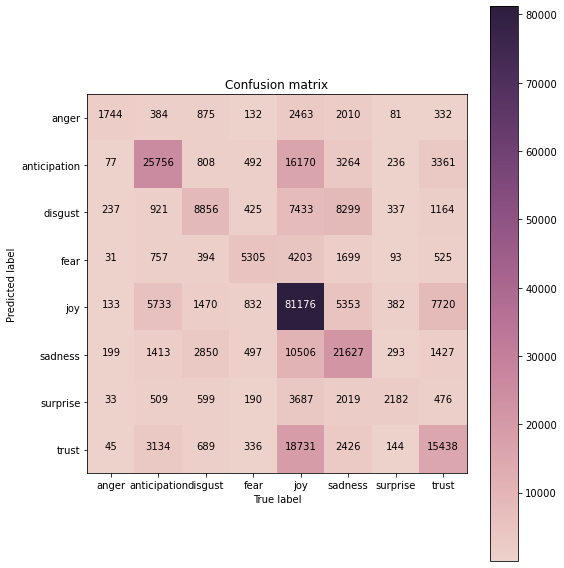

In [121]:
# plot your confusion matrix
my_tags = ['anger', 'anticipation', 'disgust', 'fear', 'sadness', 'surprise', 'trust', 'joy']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

## Output Result

In [122]:
# Load data
X_test = test_df['text']

# Transform X
X_test = featureType.transform(X_test)
print('X_test.shape: ', X_test.shape)

# Predict
y_test_pred = model.predict(X_test)
print (y_test_pred[:10])

X_test.shape:  (411972, 20000)
['anticipation' 'anticipation' 'joy' 'joy' 'trust' 'sadness' 'joy'
 'sadness' 'sadness' 'joy']


In [123]:
# Submission
submission = pd.DataFrame({'id':test_df['tweet_id'],'emotion':y_test_pred})
submission.head()

,id,emotion
2,0x28b412,anticipation
4,0x2de201,anticipation
9,0x218443,joy
30,0x2939d5,joy
33,0x26289a,trust


In [124]:
# Check the shape
submission.shape

(411972, 2)

In [125]:
path = 'Result/'
filename = 'NN_e100_TFIDF20000.csv'
submission.to_csv(path+filename, index=False)
print('Saved file: ' + filename)

Saved file: NN_e100_TFIDF20000.csv
